In [ ]:
# find num features
import pandas as pd

# # Load the preprocessed data
# !gunzip /content/ath.csv.gz
# !gunzip /content/cel.csv.gz
# !gunzip /content/dme.csv.gz

ath_data = pd.read_csv("/content/ath.csv")

# Get the number of features (number of columns excluding labels)
num_features = ath_data.shape[1] - 1  # Subtract 1 for the label column if present
print("Number of features - ath:", num_features)

dme_data = pd.read_csv("/content/dme.csv")

# Get the number of features (number of columns excluding labels)
num_features = dme_data.shape[1] - 1  # Subtract 1 for the label column if present
print("Number of features - dme:", num_features)

cel_data = pd.read_csv("/content/cel.csv")

# Get the number of features (number of columns excluding labels)
num_features = cel_data.shape[1] - 1  # Subtract 1 for the label column if present
print("Number of features - cel:", num_features)


Number of features - ath: 78


<ipython-input-6-d5ee98deb973>:15: DtypeWarning: Columns (22,75) have mixed types. Specify dtype option on import or set low_memory=False.
  dme_data = pd.read_csv("/content/dme.csv")


Number of features - dme: 78
Number of features - cel: 78


Epoch 1/10
32651/32651 [==============================] - 135s 4ms/step - loss: 0.4991 - accuracy: 0.9212 - val_loss: 0.3188 - val_accuracy: 0.8873
Epoch 2/10
32651/32651 [==============================] - 145s 4ms/step - loss: 0.3348 - accuracy: 0.9160 - val_loss: 0.2024 - val_accuracy: 0.9267
Epoch 3/10
32651/32651 [==============================] - 126s 4ms/step - loss: 0.3211 - accuracy: 0.9246 - val_loss: 0.1937 - val_accuracy: 0.9331
Epoch 4/10
32651/32651 [==============================] - 132s 4ms/step - loss: 0.3291 - accuracy: 0.9311 - val_loss: 0.2528 - val_accuracy: 0.9145
Epoch 5/10
32651/32651 [==============================] - 134s 4ms/step - loss: 0.3057 - accuracy: 0.9362 - val_loss: 0.2841 - val_accuracy: 0.9028
Epoch 6/10
32651/32651 [==============================] - 135s 4ms/step - loss: 0.2990 - accuracy: 0.9368 - val_loss: 0.1779 - val_accuracy: 0.9390
Epoch 7/10
32651/32651 [==============================] - 127s 4ms/step - loss: 0.2653 - accuracy: 0.9399 - val_

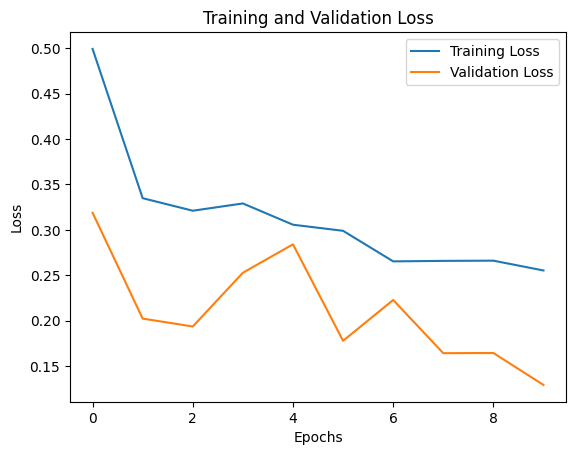

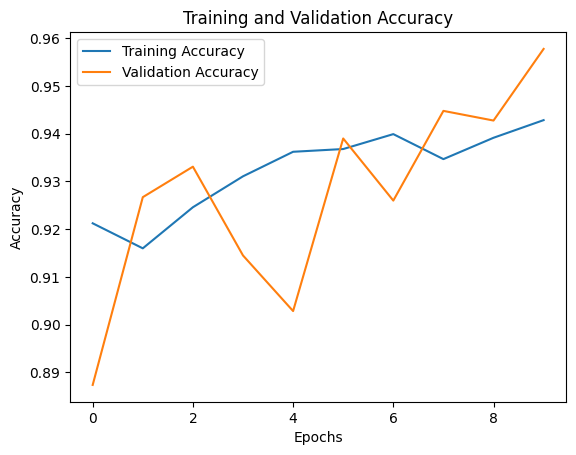

8163/8163 [==============================] - 27s 3ms/step - loss: 0.1294 - accuracy: 0.9578
Test accuracy: 0.9577884078025818
8163/8163 [==============================] - 25s 3ms/step
Precision: 0.002444545043005885
Recall: 0.7714285714285715
F1-score: 0.004873646209386282
ROC AUC: 0.9117173564758116


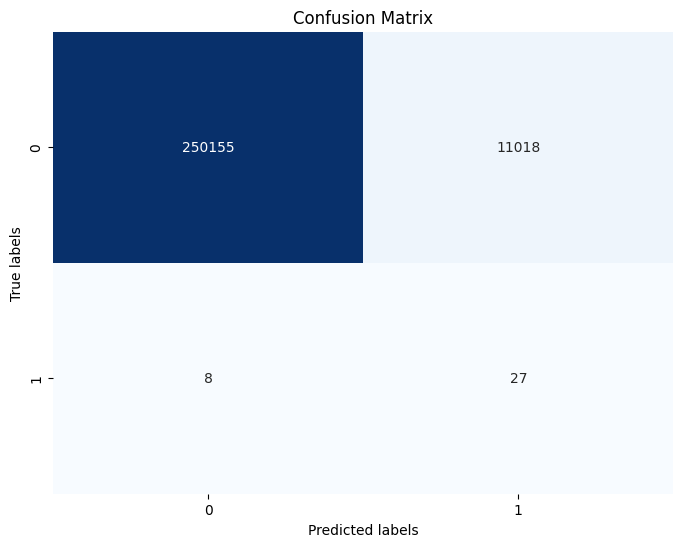

In [15]:


import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.utils.class_weight import compute_class_weight

# Load data
data = pd.read_csv("/content/cel.csv")

# Check for and handle NaN values
data = data.dropna()

# Shuffle the data randomly
data = data.sample(frac=1, random_state=1)

# Exclude non-numeric columns
X = data.select_dtypes(include=[np.number]).drop(columns=["CLASS"])  # Assuming "CLASS" is the label column
y = data["CLASS"]

# Split data into features (X) and labels (y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Preprocess data (e.g., feature scaling)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Calculate class weights
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)

# Convert class weights to dictionary format
class_weight = {i: class_weights[i] for i in range(len(class_weights))}

# Define and compile your neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', kernel_initializer='glorot_uniform'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Define the optimizer
optimizer = tf.keras.optimizers.Adam(learning_rate=1E-4)

# Compile your neural network model with BCE loss function
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Train your model with class weights
history = model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, validation_data=(X_test_scaled, y_test), class_weight=class_weight)

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

# Evaluate your model on test data
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)
print("Test accuracy:", test_accuracy)

# Evaluate additional metrics
y_pred = model.predict(X_test_scaled)
y_pred_binary = np.round(y_pred)
precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)
roc_auc = roc_auc_score(y_test, y_pred)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("ROC AUC:", roc_auc)

# Generate confusion matrix
# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_binary)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


Epoch 1/50
13/13 [==============================] - 3s 52ms/step - loss: 0.6894 - accuracy: 0.5075 - val_loss: 0.6784 - val_accuracy: 0.4500
Epoch 2/50
13/13 [==============================] - 0s 13ms/step - loss: 0.6766 - accuracy: 0.5101 - val_loss: 0.6666 - val_accuracy: 0.4500
Epoch 3/50
13/13 [==============================] - 0s 17ms/step - loss: 0.6641 - accuracy: 0.5126 - val_loss: 0.6550 - val_accuracy: 0.4600
Epoch 4/50
13/13 [==============================] - 0s 14ms/step - loss: 0.6521 - accuracy: 0.5176 - val_loss: 0.6437 - val_accuracy: 0.4800
Epoch 5/50
13/13 [==============================] - 0s 10ms/step - loss: 0.6402 - accuracy: 0.5678 - val_loss: 0.6332 - val_accuracy: 0.5600
Epoch 6/50
13/13 [==============================] - 0s 10ms/step - loss: 0.6291 - accuracy: 0.6131 - val_loss: 0.6227 - val_accuracy: 0.6400
Epoch 7/50
13/13 [==============================] - 0s 10ms/step - loss: 0.6182 - accuracy: 0.6734 - val_loss: 0.6127 - val_accuracy: 0.6900
Epoch 8/50
13

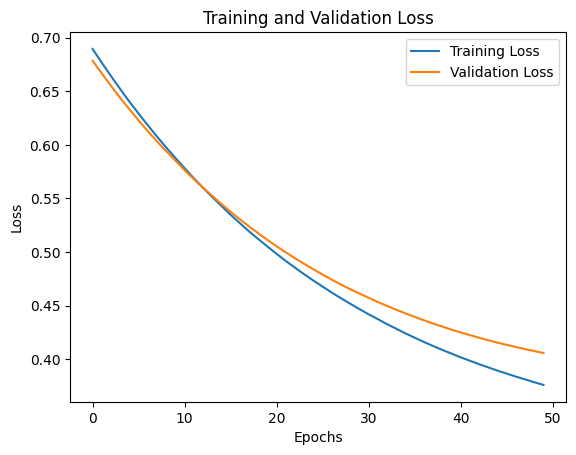

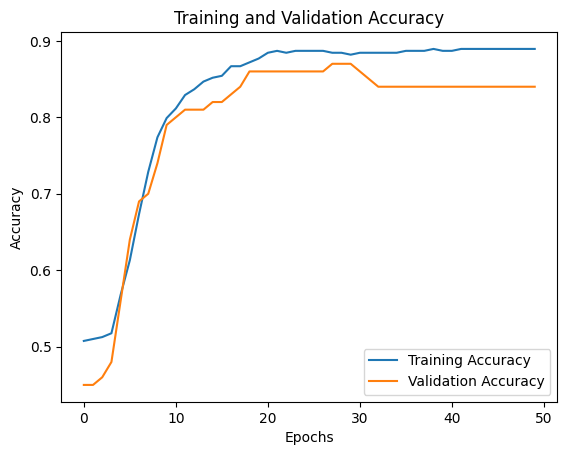

4/4 [==============================] - 0s 5ms/step - loss: 0.4059 - accuracy: 0.8400
Test accuracy: 0.8399999737739563
4/4 [==============================] - 0s 4ms/step
Precision: 0.8918918918918919
Recall: 0.7333333333333333
F1-score: 0.8048780487804879
ROC AUC: 0.9103030303030303


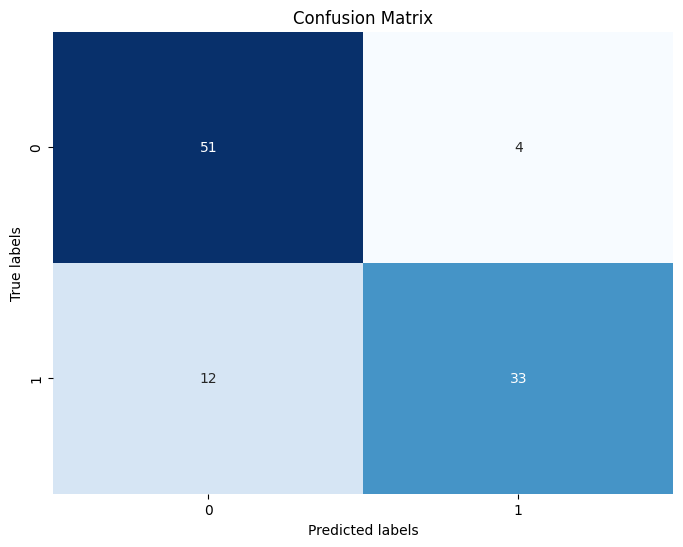

In [2]:
## equal true pos and neg - cel

import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils.class_weight import compute_class_weight

# Load and preprocess data
data = pd.read_csv("/content/cel.csv")
data = data.dropna()
data = data.sample(frac=1, random_state=1)

# Balance data
positive_data = data[data["CLASS"] == 1]
negative_data = data[data["CLASS"] == 0]
positive_samples = positive_data.shape[0]
negative_data = negative_data.sample(n=positive_samples, random_state=1)
balanced_data = pd.concat([positive_data, negative_data])

# Features and labels
selected_features = ['mfe', 'efe', 'dG', 'triplets0', 'mfei4']
X = balanced_data[selected_features]
y = balanced_data["CLASS"]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weight = {i: class_weights[i] for i in range(len(class_weights))}

# NN architecture
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', kernel_initializer='glorot_uniform', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])


optimizer = tf.keras.optimizers.Adam(learning_rate=1E-4)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Training
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_data=(X_test_scaled, y_test), class_weight=class_weight)

# Plotting loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Plot validation
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

# Test model
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)
print("Test accuracy:", test_accuracy)

# More analyses
y_pred = model.predict(X_test_scaled)
y_pred_binary = np.round(y_pred)
precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)
roc_auc = roc_auc_score(y_test, y_pred)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("ROC AUC:", roc_auc)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_binary)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


Epoch 1/50
16/16 [==============================] - 2s 27ms/step - loss: 0.6375 - accuracy: 0.5021 - val_loss: 0.6136 - val_accuracy: 0.5246
Epoch 2/50
16/16 [==============================] - 0s 9ms/step - loss: 0.6249 - accuracy: 0.5103 - val_loss: 0.5983 - val_accuracy: 0.5410
Epoch 3/50
16/16 [==============================] - 0s 8ms/step - loss: 0.6130 - accuracy: 0.5144 - val_loss: 0.5841 - val_accuracy: 0.5656
Epoch 4/50
16/16 [==============================] - 0s 7ms/step - loss: 0.6018 - accuracy: 0.5494 - val_loss: 0.5701 - val_accuracy: 0.6066
Epoch 5/50
16/16 [==============================] - 0s 8ms/step - loss: 0.5913 - accuracy: 0.6008 - val_loss: 0.5565 - val_accuracy: 0.6557
Epoch 6/50
16/16 [==============================] - 0s 7ms/step - loss: 0.5808 - accuracy: 0.6605 - val_loss: 0.5446 - val_accuracy: 0.7377
Epoch 7/50
16/16 [==============================] - 0s 8ms/step - loss: 0.5712 - accuracy: 0.7202 - val_loss: 0.5322 - val_accuracy: 0.8279
Epoch 8/50
16/16 [=

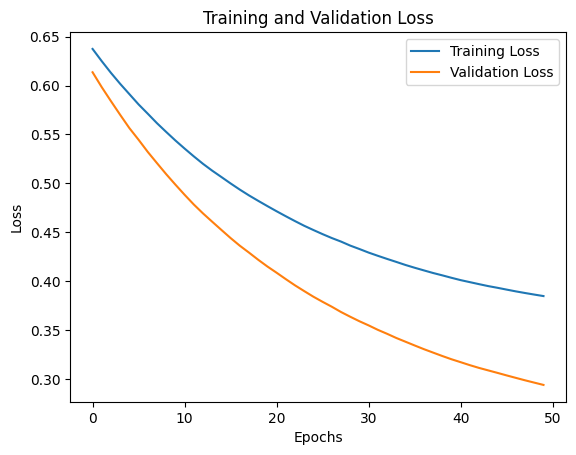

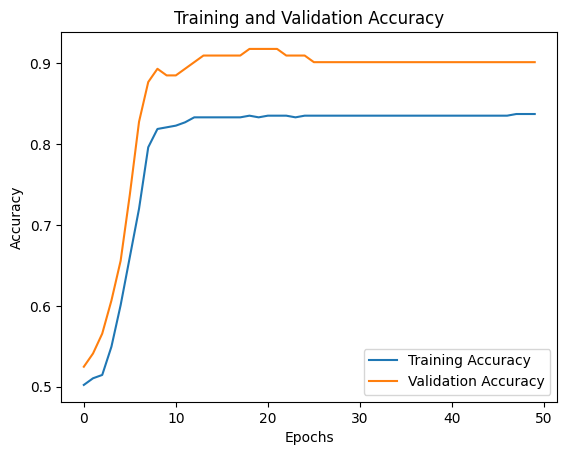

4/4 [==============================] - 0s 5ms/step - loss: 0.2939 - accuracy: 0.9016
Test accuracy: 0.9016393423080444
4/4 [==============================] - 0s 3ms/step
Precision: 0.98
Recall: 0.8166666666666667
F1-score: 0.890909090909091
ROC AUC: 0.9575268817204301


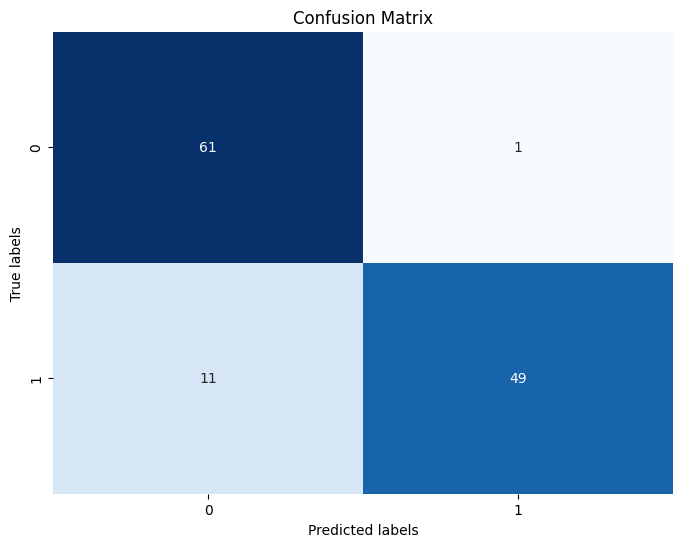

In [11]:
## equal true pos and neg - ath

import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils.class_weight import compute_class_weight

# Load and preprocess data
data = pd.read_csv("/content/ath.csv")
data = data.dropna()
data = data.sample(frac=1, random_state=1)

# Balance data
positive_data = data[data["CLASS"] == 1]
negative_data = data[data["CLASS"] == 0]
positive_samples = positive_data.shape[0]
negative_data = negative_data.sample(n=positive_samples, random_state=1)
balanced_data = pd.concat([positive_data, negative_data])

# Features and labels
selected_features = ['mfe', 'efe', 'dG', 'triplets0', 'mfei4']
X = balanced_data[selected_features]
y = balanced_data["CLASS"]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weight = {i: class_weights[i] for i in range(len(class_weights))}

# NN architecture
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', kernel_initializer='glorot_uniform', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])


optimizer = tf.keras.optimizers.Adam(learning_rate=1E-4)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Training
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_data=(X_test_scaled, y_test), class_weight=class_weight)

# Plotting loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Plot validation
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

# Test model
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)
print("Test accuracy:", test_accuracy)

# More analyses
y_pred = model.predict(X_test_scaled)
y_pred_binary = np.round(y_pred)
precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)
roc_auc = roc_auc_score(y_test, y_pred)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("ROC AUC:", roc_auc)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_binary)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

Epoch 1/50
16/16 [==============================] - 2s 27ms/step - loss: 0.6873 - accuracy: 0.5617 - val_loss: 0.6706 - val_accuracy: 0.7459
Epoch 2/50
16/16 [==============================] - 0s 8ms/step - loss: 0.6706 - accuracy: 0.7469 - val_loss: 0.6492 - val_accuracy: 0.8607
Epoch 3/50
16/16 [==============================] - 0s 9ms/step - loss: 0.6549 - accuracy: 0.7963 - val_loss: 0.6282 - val_accuracy: 0.8607
Epoch 4/50
16/16 [==============================] - 0s 9ms/step - loss: 0.6394 - accuracy: 0.8066 - val_loss: 0.6086 - val_accuracy: 0.8689
Epoch 5/50
16/16 [==============================] - 0s 9ms/step - loss: 0.6247 - accuracy: 0.8251 - val_loss: 0.5902 - val_accuracy: 0.8852
Epoch 6/50
16/16 [==============================] - 0s 7ms/step - loss: 0.6112 - accuracy: 0.8313 - val_loss: 0.5724 - val_accuracy: 0.8934
Epoch 7/50
16/16 [==============================] - 0s 7ms/step - loss: 0.5980 - accuracy: 0.8395 - val_loss: 0.5555 - val_accuracy: 0.8934
Epoch 8/50
16/16 [=

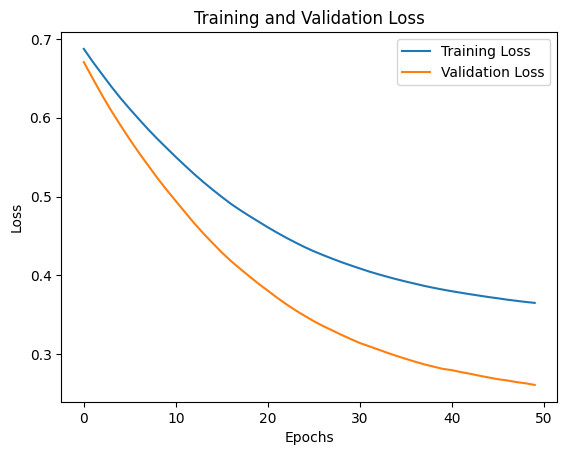

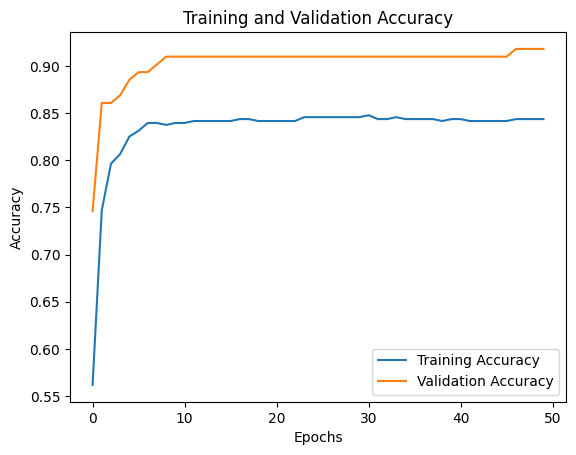

4/4 [==============================] - 0s 4ms/step - loss: 0.2612 - accuracy: 0.9180
Test accuracy: 0.9180327653884888
4/4 [==============================] - 0s 5ms/step
Precision: 1.0
Recall: 0.8333333333333334
F1-score: 0.9090909090909091
ROC AUC: 0.9575268817204301


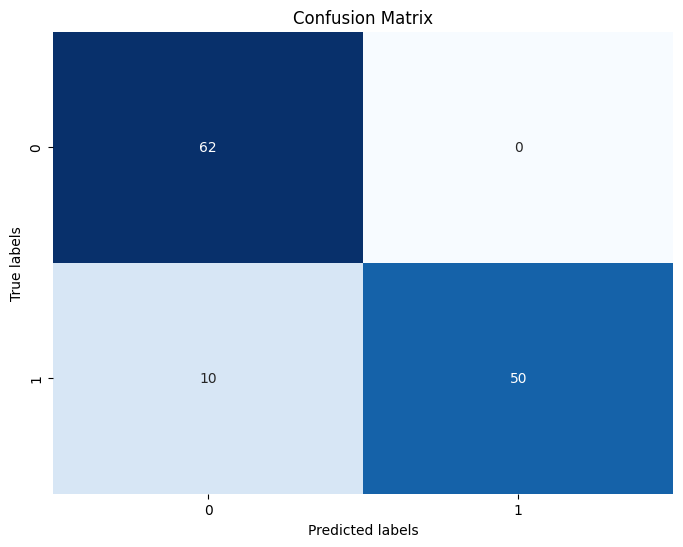

In [12]:
## equal true pos and neg - dme

import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils.class_weight import compute_class_weight

# Load and preprocess data
data = pd.read_csv("/content/ath.csv")
data = data.dropna()
data = data.sample(frac=1, random_state=1)
data.columns = data.columns.str.strip()

# Balance data
positive_data = data[data["CLASS"] == 1]
negative_data = data[data["CLASS"] == 0]
positive_samples = positive_data.shape[0]
negative_data = negative_data.sample(n=positive_samples, random_state=1)
balanced_data = pd.concat([positive_data, negative_data])

# Features and labels
selected_features = ['mfe', 'efe', 'dG', 'triplets0', 'mfei4']
X = balanced_data[selected_features]
y = balanced_data["CLASS"]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weight = {i: class_weights[i] for i in range(len(class_weights))}

# NN architecture
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', kernel_initializer='glorot_uniform', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu', kernel_initializer='glorot_uniform', input_shape=(X_train.shape[1],)),

    tf.keras.layers.Dense(1, activation='sigmoid')
])


optimizer = tf.keras.optimizers.Adam(learning_rate=1E-4)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Training
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_data=(X_test_scaled, y_test), class_weight=class_weight)

# Plotting loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Plot validation
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

# Test model
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)
print("Test accuracy:", test_accuracy)

# More analyses
y_pred = model.predict(X_test_scaled)
y_pred_binary = np.round(y_pred)
precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)
roc_auc = roc_auc_score(y_test, y_pred)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("ROC AUC:", roc_auc)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_binary)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

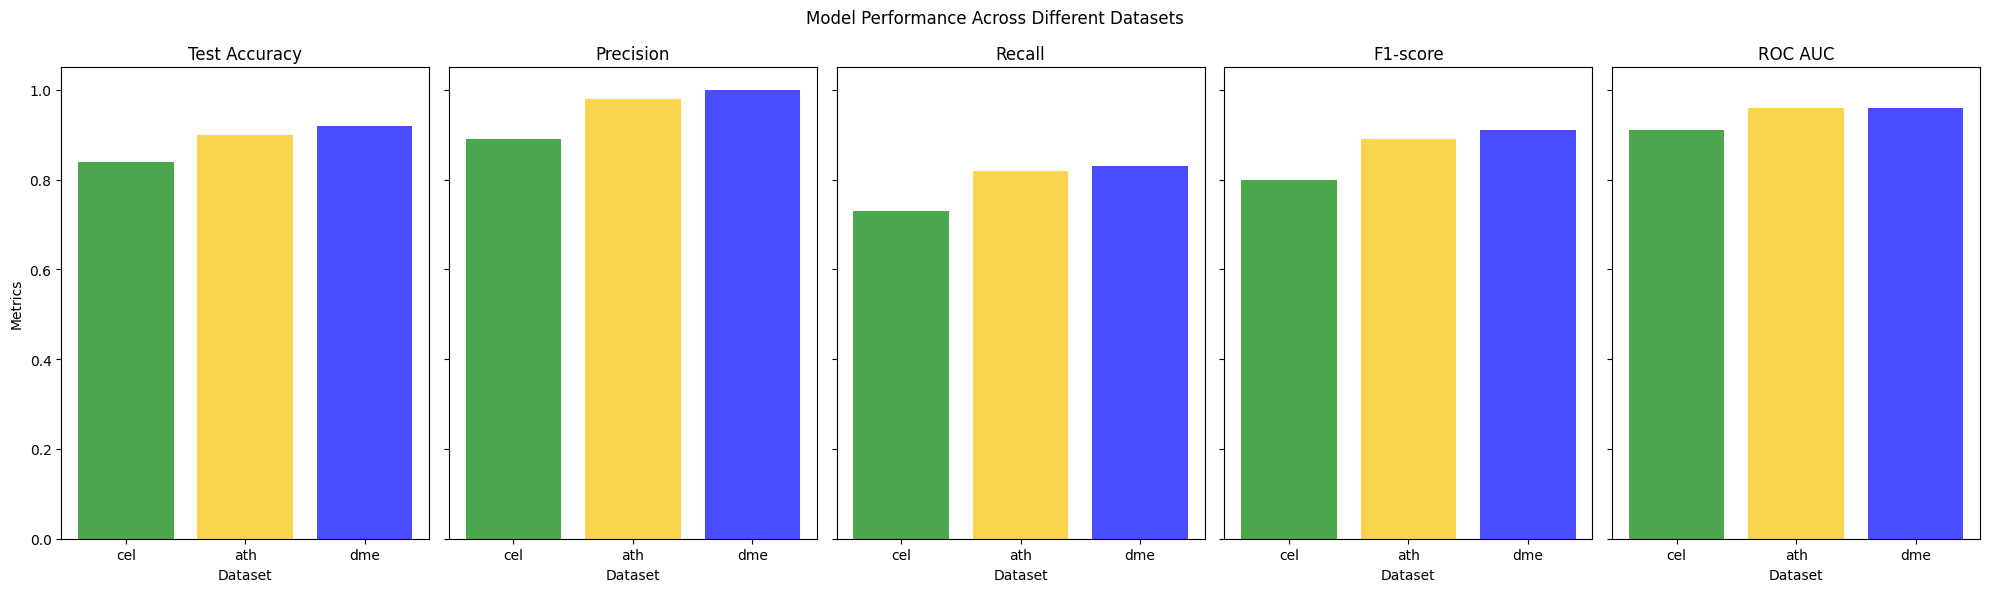

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# evaluation metrics from models above
datasets = ['cel', 'ath', 'dme']
test_accuracy = [0.84, 0.90, 0.92]
precision = [0.89, 0.98, 1.0]
recall = [0.73, 0.82, 0.83]
f1_score = [0.80, 0.89, 0.91]
roc_auc = [0.91, 0.96, 0.96]

metrics = [test_accuracy, precision, recall, f1_score, roc_auc]
metric_labels = ['Test Accuracy', 'Precision', 'Recall', 'F1-score', 'ROC AUC']
colors = ['green', '#FAC205', 'blue']

# plot metrics to display similar performances
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(20, 6), sharey=True)

for i, metric in enumerate(metrics):
    for j, data in enumerate(metric):
        axes[i].bar(j, data, align='center', alpha=0.7, color=colors[j])
    axes[i].set_title(metric_labels[i])
    axes[i].set_xticks(np.arange(len(datasets)))
    axes[i].set_xticklabels(datasets)
    axes[i].set_xlabel('Dataset')

axes[0].set_ylabel('Metrics')
plt.suptitle('Model Performance Across Different Datasets')
plt.tight_layout()
plt.show()



In [18]:
from scipy.stats import kruskal

# stats test
kw_test_accuracy = kruskal(test_accuracy[0], test_accuracy[1], test_accuracy[2])
kw_precision = kruskal(precision[0], precision[1], precision[2])
kw_recall = kruskal(recall[0], recall[1], recall[2])
kw_f1_score = kruskal(f1_score[0], f1_score[1], f1_score[2])
kw_roc_auc = kruskal(roc_auc[0], roc_auc[1], roc_auc[2])

print("Kruskal-Wallis Test Results:")
print("Test accuracy:", kw_test_accuracy)
print("Precision:", kw_precision)
print("Recall:", kw_recall)
print("F1-score:", kw_f1_score)
print("ROC AUC:", kw_roc_auc)


Kruskal-Wallis Test Results:
Test accuracy: KruskalResult(statistic=1.1073446327683614, pvalue=0.5748349537270753)
Precision: KruskalResult(statistic=1.0980392156862742, pvalue=0.5775157248131946)
Recall: KruskalResult(statistic=0.8291316526610615, pvalue=0.6606270453160719)
F1-score: KruskalResult(statistic=1.4117647058823515, pvalue=0.49367278838913053)
ROC AUC: KruskalResult(statistic=1.7321937321937297, pvalue=0.4205899686483989)
